Roka Hosono, Veda Pedagati, Jahnavi Tumeti
Project 2

In [1]:
!pip install ts2vg
!pip install igraph

DO NOT RUN BELOW CODE. IT CREATES A CSV FILE CALLED Accelometer_Visibility_Graph_Data_Subjects.csv AND THE NEXT CELL USES THAT. THIS CODE TAKES FOREVER TO MAKE THE CSV

In [ ]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import pandas as pd
from ts2vg import NaturalVG, HorizontalVG
import igraph as ig
import networkx as nx

def create_VG(data,attribute,VGtype):
    if VGtype=="NVG":
        attribute="attr_"+attribute
        g=NaturalVG()
        g.build(data[attribute][1000:2024])
        edges=g.edges
        ng=nx.Graph(edges)
        deg=ng.degree()
        g2=ig.Graph(edges=edges)
        return ["NVG",nx.diameter(ng),ig.mean(g2.degree()),nx.average_shortest_path_length(ng)]
    elif VGtype=="HVG":
        attribute="attr_"+attribute
        g=HorizontalVG()
        g.build(data[attribute][1000:2024])
        edges=g.edges
        ng=nx.Graph(edges)
        g2=ig.Graph(edges=edges)
        return ["HVG",nx.diameter(ng),ig.mean(g2.degree()),nx.average_shortest_path_length(ng)]

path=""
numsubjects=15
Activity=["Walking","Running","Climbing Up", "Climbing Down"]
body_parts=["chest","forearm","head","shin","thigh","upperarm","waist"]
axis=["x","y","z"]

data = {'Method': [],
        'Subject': [],
        'Accelorometer Axis':[],
        'Average Degree':[],
        'Network Diameter':[],
        'Average Path Pength':[],
        'Activity':[],
        'Body Part':[]}
  
# Create DataFrame
chart = pd.DataFrame(data)



for i in range(1,numsubjects+1):
    for j in Activity:
        
        path="Subject "+str(i)+"/"+j+"/acc_"+j.lower().replace(" ","")+"_"+body_parts[0]+".csv"
        print(path)
        file=pd.read_csv(path)            
        for l in axis:
            NVGData=create_VG(file,l,VGtype="NVG")
            HVGData=create_VG(file,l,VGtype="HVG")
            data2= {'Method': "NVG",
                    'Subject': 1,
                    'Accelorometer Axis':l,
                    'Average Degree':NVGData[2],                        
                    'Network Diameter':NVGData[1],
                    'Average Path Pength':NVGData[3],
                    'Activity':j,
                    'Body Part':body_parts[0]}
                
            data3= {'Method': "HVG",
                    'Subject': 1,
                    'Accelorometer Axis':l,
                    'Average Degree':HVGData[2],
                    'Network Diameter':HVGData[1],
                    'Average Path Pength':HVGData[3],
                    'Activity':j,
                    'Body Part':body_parts[0]}
            chart=chart.append(data2,ignore_index=True)
            chart=chart.append(data3,ignore_index=True)
display(chart)
chart.to_csv("Accelometer_Visibility_Graph_Data_Subjects.csv")

            




USES Accelometer_Visibility_Graph_Data_Subjects.csv THAT WAS MADE FROM THE ABOVE CELL

     Unnamed: 0 Method  Subject Accelorometer Axis  Average Degree  \
0             0    NVG      1.0                  x       11.451172   
1             1    HVG      1.0                  x        3.958984   
6             6    NVG      1.0                  x        8.414062   
7             7    HVG      1.0                  x        3.962891   
12           12    NVG      1.0                  x       15.376953   
..          ...    ...      ...                ...             ...   
343         343    HVG      1.0                  x        3.964844   
348         348    NVG      1.0                  x       12.820313   
349         349    HVG      1.0                  x        3.953125   
354         354    NVG      1.0                  x       11.130859   
355         355    HVG      1.0                  x        3.951172   

     Network Diameter  Average Path Pength       Activity Body Part  
0                10.0             4.441492        Walking     chest  
1                26

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer')

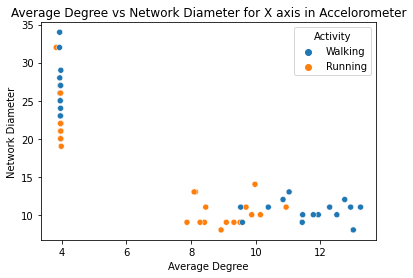

In [2]:
import pandas as pd
import seaborn as sns
visibility=pd.read_csv("Accelometer_Visibility_Graph_Data_Subjects.csv")
x_axis=visibility.loc[visibility['Accelorometer Axis']=='x']
x_axis1=x_axis.loc[(x_axis['Activity']=='Climbing Up')| (x_axis['Activity']=='Climbing Down')]
x_axis2=x_axis.loc[(x_axis['Activity']=='Walking')| (x_axis['Activity']=='Running')]
y_axis=visibility.loc[visibility['Accelorometer Axis']=='y']
y_axis1=y_axis.loc[(visibility['Activity']=='Climbing Up')| (visibility['Activity']=='Climbing Down')]
y_axis2=y_axis.loc[(visibility['Activity']=='Running')| (visibility['Activity']=='Walking')]
z_axis=visibility.loc[visibility['Accelorometer Axis']=='z']
z_axis1=z_axis.loc[(visibility['Activity']=='Climbing Up')| (visibility['Activity']=='Climbing Down')]
z_axis2=z_axis.loc[(visibility['Activity']=='Running')| (visibility['Activity']=='Walking')]
NVG=visibility.loc[visibility['Method']=='NVG']
NVG1=NVG.loc[(NVG['Activity']=='Climbing Up')| (NVG['Activity']=='Climbing Down')]
NVG2=NVG.loc[(NVG['Activity']=='Walking')| (NVG['Activity']=='Running')]
HVG=visibility.loc[visibility['Method']=='HVG']
HVG1=HVG.loc[(HVG['Activity']=='Climbing Up')| (HVG['Activity']=='Climbing Down')]
HVG2=HVG.loc[(HVG['Activity']=='Walking')| (HVG['Activity']=='Running')]
print(x_axis)

ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=x_axis2)
ax.set_title("Average Degree vs Network Diameter for X axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Y axis in Accelorometer')

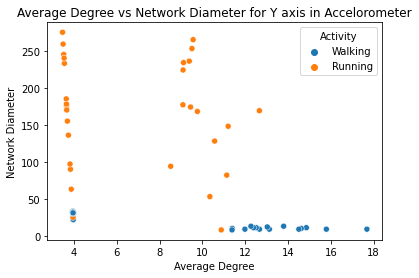

In [3]:
ax2=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=y_axis2)
ax2.set_title("Average Degree vs Network Diameter for Y axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Z axis in Accelorometer')

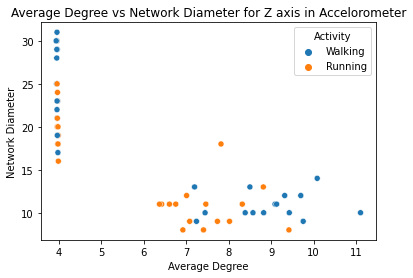

In [4]:
ax2=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=z_axis2)
ax2.set_title("Average Degree vs Network Diameter for Z axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Natural Visibility Graph')

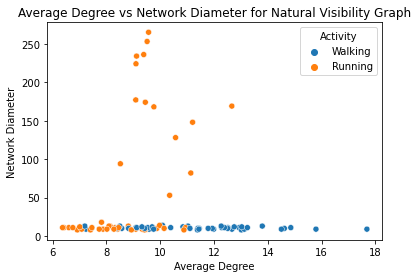

In [5]:
ax3=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=NVG2)
ax3.set_title("Average Degree vs Network Diameter for Natural Visibility Graph")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Horizontal Visibility Graph')

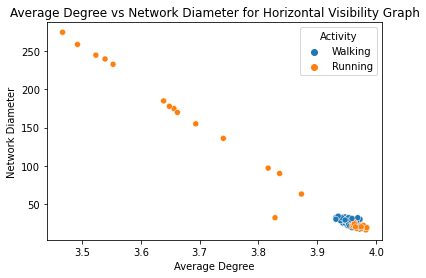

In [6]:
ax3=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=HVG2)
ax3.set_title("Average Degree vs Network Diameter for Horizontal Visibility Graph")

Scatterplots for Climbing Up/Down

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer')

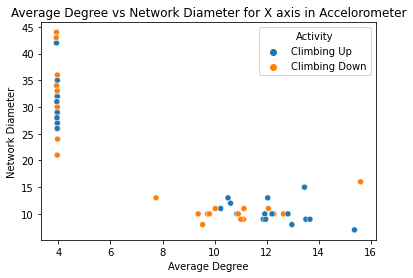

In [7]:
ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=x_axis1)
ax.set_title("Average Degree vs Network Diameter for X axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Y axis in Accelorometer')

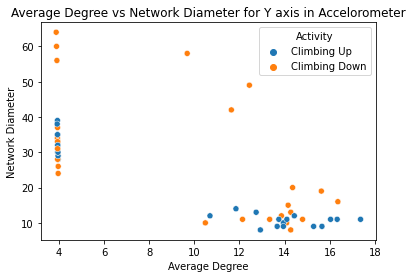

In [8]:
ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=y_axis1)
ax.set_title("Average Degree vs Network Diameter for Y axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Z axis in Accelorometer')

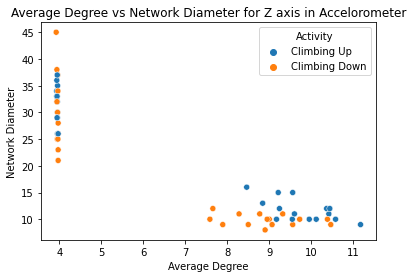

In [9]:
ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=z_axis1)
ax.set_title("Average Degree vs Network Diameter for Z axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Natural Visibility in Accelorometer')

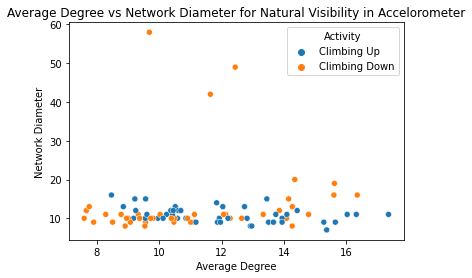

In [10]:
ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=NVG1)
ax.set_title("Average Degree vs Network Diameter for Natural Visibility in Accelorometer")

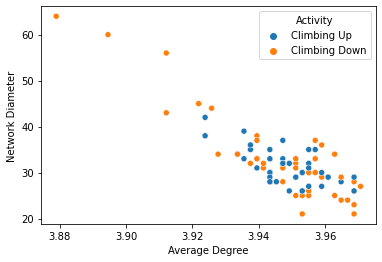

In [11]:
ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=HVG1)